In [38]:
# importing the necessary modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Prospect Mapping for PGL

#### Questions
- PP Bracket?
- What is the true indicator to measure success of a field?
- FY?

I used a script to convert the data to a csv file as it was taking about 30 seconds to read the excel sheet. CSV is usually faster to read.

In [39]:
# Importing the data from the .xlsx as a data frame using the pandas module
df = pd.read_csv("PGL_data.csv", low_memory = False)

df now holds the whole data frame which is a bit too large to handle. Below I have created a list of all the headings so that I can see them without opening the excel sheet. When I want to reference a heading, I can just use the index of the heading rather than having to remember the name. These are stored in the variable 'col'.

In [40]:
col = df.columns.tolist()

print('index  |                     column name     |    number of entries')
print('-------------------------------------------------------------------------------------')
for heading in col:
    print("%3.0f    |    %30s   |    %8.0f" % (col.index(heading), heading, len(df[heading].loc[df[heading].notna()])))
print('-------------------------------------------------------------------------------------')
#df.head()

index  |                     column name     |    number of entries
-------------------------------------------------------------------------------------
  0    |                      Account Name   |      187864
  1    |          Establishment Aplicor ID   |      187858
  2    |                Contact Aplicor ID   |      187864
  3    |                             Stage   |      187514
  4    |                Opportunity Source   |       87182
  5    |                       Loss Reason   |       51912
  6    |                           Product   |      183022
  7    |                            Course   |       59973
  8    |                 Booking Reference   |      187864
  9    |             Centre(s) of Interest   |       63827
 10    |                Accommodation Type   |       21327
 11    |                      Arrival Date   |      165044
 12    |                      Booking Date   |      139149
 13    |                         Age Range   |       59343
 14    |            

d1 below is formed of only the colums that I want to begin working with. The resulting dataframe can be seen printed underneath it

In [41]:
d1 = df[[col[0], col[33],col[40],col[20]]]
d1

,Account Name,Number of Children Banding,Booking Season,Requested Duration
0,Alma Park Primary School,NaN,NaN,NaN
1,Kincardine O'Neil Primary School,NaN,NaN,NaN
2,St Peters CE Primary School,NaN,NaN,NaN
3,St Johns Academy,51-100,NaN,5d/4n
4,Our Ladys RC High School,NaN,NaN,NaN
...,...,...,...,...
187859,Bradley Stoke Community School,51-100,NaN,Ad hoc (add details to Booking notes field)
187860,Fordham All Saints Ce Primary School,NaN,NaN,NaN
187861,Archbishop Hutton Primary School,NaN,NaN,NaN
187862,Sir John Lawes School,151-200,Autumn,NaN


***
To analyse the effects of a school caracteristic on their interaction with PGL, a column must be chosen which represents the extent of interaction and this column should really be filled in for all schools.

In [42]:
k=6
print(col[k])
df[col[k]].loc[df[col[k]].notna()]

Product


0         AUK (Adventure UK)
1         AUK (Adventure UK)
2         AUK (Adventure UK)
3         AUK (Adventure UK)
4                   SK (Ski)
                 ...        
187859    AUK (Adventure UK)
187860    AUK (Adventure UK)
187861    AUK (Adventure UK)
187862    AUK (Adventure UK)
187863    AUK (Adventure UK)
Name: Product, Length: 183022, dtype: object

***
### Number of Children band

Let's focus on one caracteristic at a time starting with Number of Children.

There seems to be a lot of empty cells so to begin with, it may be useful to understand what proportion of each column is blank.
The line below is removing all lines in this column that have NaN in the cell and showing how many rows remain. Number of Children has been used as an example.

In [43]:
def notna_in_col(name):
    print("total amount of entries " + str(len(df)))
    print("amount of non NaN in " + name + " " + str(len(df[name].loc[df[name].notna()])))
    print(str(len(df[name].loc[df[name].notna()]) / len(df) * 100) + "% of schools have an entry for this column")
    
notna_in_col('Number of Children Band')

total amount of entries 187864
amount of non NaN in Number of Children Band 154771
82.38459736830899% of schools have an entry for this column


***
By taking the number of children column and removing all empty cells, the row count falls from 187864 to 154771 meaning that 82.4% of schools have a value for that column.

I wanted to briefly look at one that looked sparsely populated. For the School Size by Pupils Banding, only 32.9% of schools have a value for this category. If an average value has to be given to the schools without values, this may skew the data for this category. I would suggest that columns withless than 50% of schools data should probabily be removed from a decile scoring to avoid adding weight to averages.

Below is a count of how many schools are in each band. This is interesting to know however does not tell us anything about how this affects the interaction with PGL.

In [44]:
a = 39
print(col[a])
df[col[a]].loc[df[col[a]].notna()].value_counts()

New_Existing


Existing    164170
New          23694
Name: New_Existing, dtype: int64

***
To find how a certain column affects the schools interaction with PGL, a quantifiying column must be chosen which tells us their level of interaction. This column must also be completely, or at least mostly, populated to show this correlation.

I have updated the table in cell 3 to add a column which includes how many entries each column has to see if a characteristic can be used to judge a schools interaction with PGL.

New_existing could have been useful I think if it said how many time a school used PGL instead of a binary answer.

Below is a line to see the first 50 entries of a column. Just useful to get a preview without having to open up the data. It is commented out at the moment to reduce clutter.

In [45]:
#df[col[20]].loc[df[col[20]].notna()].head(50)

***
Now looking at the influence of a column starting with the number of children. Maybe the time lapse band will be a good indication of how keen they are? Might be misinterpretting this. I see that there are a lot of lines saying 'Do Not Apply' which I think is like being empty so making sure that there are enough entries, the next cell will work out how many cells have an entry and removing any that have No Not Apply. 

In [46]:
time_lapse_notna  = df[col[41]].loc[df[col[41]].notna()]
time_lapse_notna = time_lapse_notna.loc[~time_lapse_notna.str.contains("Do Not Apply")]
print(len(time_lapse_notna))

164987


There are enough cells with data to use it.

Below I am plotting Time lapse against Number of Children to see if there is any relationship.

Text(0, 0.5, 'Number of Children Banding')

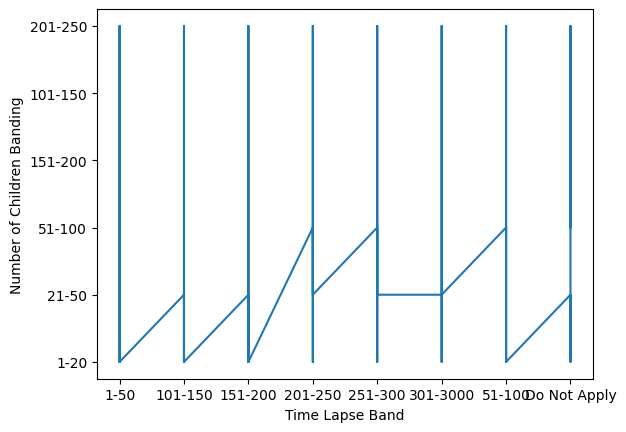

In [47]:
dx = df.loc[df[col[41]].notna() & df[col[33]].notna()].sort_values(col[41],ascending = True)  
plt.plot(dx[col[41]],dx[col[33]])
plt.xlabel('%s' % col[41])
plt.ylabel('%s' % col[33])

From this plot its clear that there is no trend to extract, also, with banded categories, it would be hard to extract any linear regressions.

I am going to create a function below which will plot any two categories for us to quickly flick through combinations.

There are  160007  number of entries for this plot


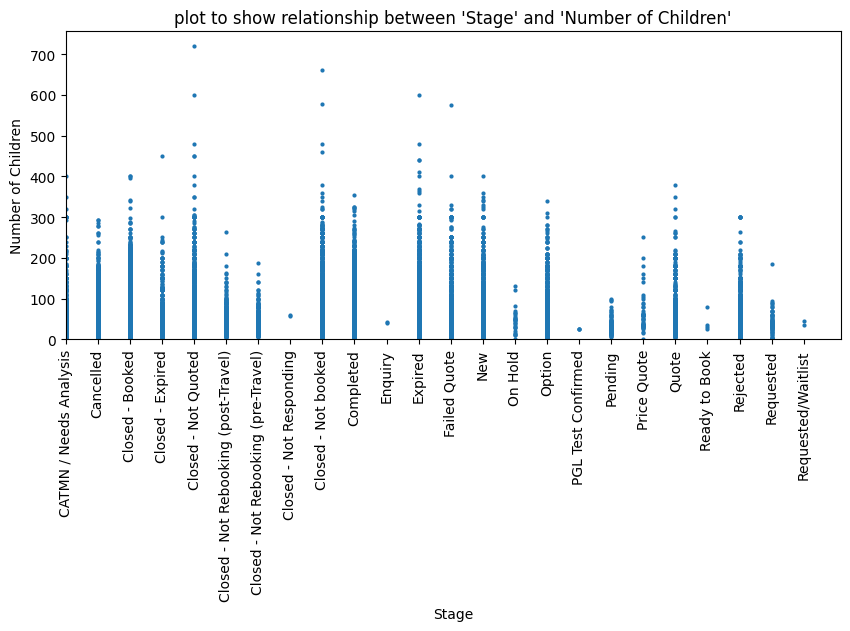

In [92]:
import seaborn as sns
def relationshiplot(x,y):
    dx = df.loc[df[x].notna() & df[y].notna()].sort_values(x,ascending = True)  
    #sns.lineplot(dx[x],dx[y])
    print('There are ',len(dx), ' number of entries for this plot')
    plt.figure(figsize=(10,4))
    plt.scatter(dx[x],dx[y],marker='.', linewidths=0.01)
    plt.xlabel('%s' % x)
    plt.xlim(0)
    plt.ylim(0)
    plt.tick_params(rotation=90, axis = 'x')
    plt.ylabel('%s' % y)
    plt.title("plot to show relationship between '%s' and '%s'" % (x, y))

relationshiplot(col[3],col[14])

This plot above shows us a bit more about the relationship between the stage of the booking and the number of children. This time I used the number of children as raw number rather than the band which I believe shows a better relationship. The before plotting, the function eliminates any schools that don't have a value for one or the other.

Total revenue is probably a good area to look into. This category has 187864 entries meaning 61.9% of schools have a value for this.

There are  62367  number of entries for this plot


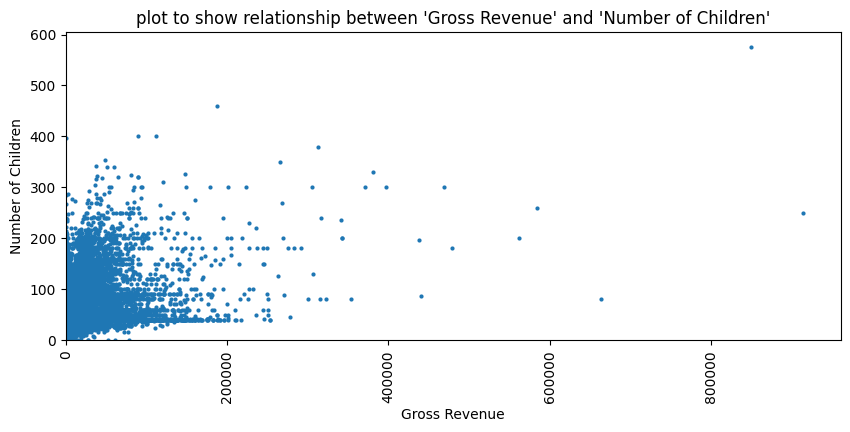

In [93]:
relationshiplot(col[22],col[14])

This data is quite hard to read plotted like this. I'd say there is a trend for higher revenue for a higher number of children howeverthere seems to be a wall of 0 revenue. Below the 0 values for revenue will be removed to try and clean up the plot and the axis limits will be adjusted.

62369
There are  62367  number of entries for this plot


(0.0, 400.0)

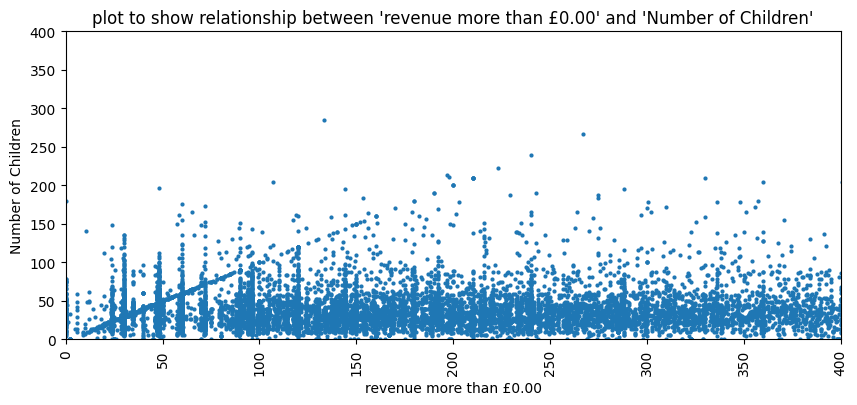

In [96]:
print(len(df[col[22]].loc[df[col[22]].notna() & (df[col[22]] != 0)]))
df['revenue more than £0.00'] = df[col[22]].replace(0, np.nan)
relationshiplot('revenue more than £0.00',col[14])
plt.ylim([0,400])
plt.xlim([0,400])

The last plot has had all 0 values removed from the revenue and limits of 400 applied to both axes. By scaling into the graph like this, a very clear trend can be seen for some data but also vertical lines at points which would suggest a strange level of correlation.

There are  22050  number of entries for this plot


(-1.0, 10.5)

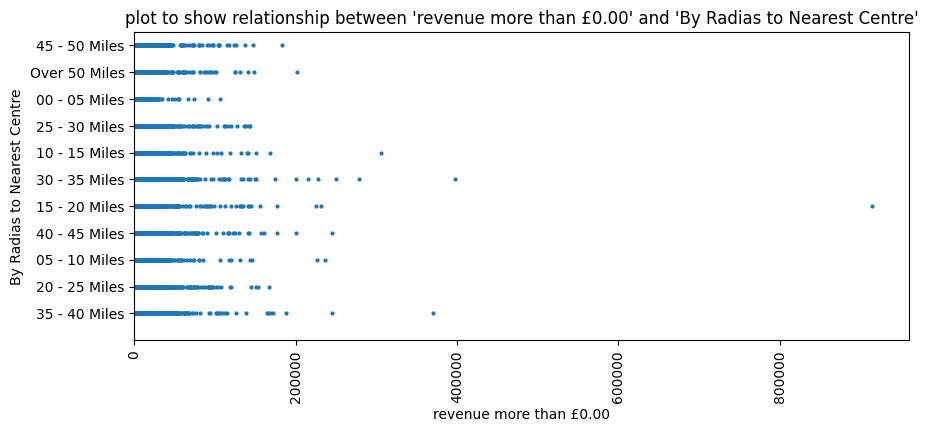

In [101]:
relationshiplot('revenue more than £0.00',col[45])
plt.ylim(-1)